# Diabetes Prediction

## Business Understanding

### **Business Needs**

The business needs are centered around enhancing the early detection and management of diabetes to improve patient outcomes and optimize healthcare resources.

### **Problem Statement**

The healthcare industry is in a constant quest to improve patient care and make the most efficient use of its resources. One of the major challenges faced by healthcare providers today is the early detection and effective management of chronic diseases, particularly diabetes. Diabetes is a pervasive condition impacting millions globally, and if left unmanaged, it can lead to severe health complications including heart disease, kidney failure, and nerve damage.

Traditional approaches to diagnosing diabetes primarily depend on routine health check-ups and blood tests. While these methods are effective, they often result in delayed detection, especially in individuals who do not seek regular medical attention. This delay in diagnosis can hinder timely intervention, allowing the disease to progress unchecked and increasing the risk of complications. Early detection is crucial in managing diabetes more effectively, as it enables timely therapeutic interventions, lifestyle modifications, and continuous monitoring, which can significantly improve patient outcomes and quality of life.

### **Our Approach**

Our machine learning model offers a sophisticated approach to predicting diabetes onset by analyzing a comprehensive dataset of health metrics. This predictive capability empowers healthcare providers to identify at-risk individuals early and take proactive measures to mitigate the disease's impact.

## Data Understanding (Exploratory Data Analysis)

### **Getting Started with our Data**

In [ ]:
! pip install ucimlrepo --quiet

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, loguniform, randint
from sklearn.metrics import classification_report
from sklearn import svm

In [ ]:
# Reading in data
df = pd.read_csv('diabetes.csv')

# Shape of the dataframe
print("Shape of the dataframe (row, col):",df.shape,"\r\n")

# Checking data types of the variables
print(df.info())

df.head()

Shape of the dataframe (row, col): (70692, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth              

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### **Variable information (Categorical Equivalent)**

In [ ]:
# Fetching from UCI ML Repo
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Explaining the feature information
var_info = pd.concat([cdc_diabetes_health_indicators.variables.name,
                      cdc_diabetes_health_indicators.variables.description],axis=1)

# Expanding column width to view variable description
pd.set_option('display.max_colwidth',250)
print(var_info['description'])

0                                                                                                                                                                                                                                                    Patient ID
1                                                                                                                                                                                                                   0 = no diabetes 1 = prediabetes or diabetes
2                                                                                                                                                                                                                                    0 = no high BP 1 = high BP
3                                                                                                                                                                                                                  0 = no high cholester

**Age description:**

**1** = 18-24,
**2** = 25-29,
**3** = 30-34,
**4** = 35-39,

**5** = 40-44,
**6** = 45-49,
**7** = 50-54,
**8** = 55-59,

**9** = 60-64,
**10** = 65-69,
**11** = 70-74,
**12** = 75-79,
**13** = 80 or older

### **Correcting the data types of our variables**

In [ ]:
df = df.astype(int)

pd.set_option('display.max_colwidth',100)
df.dtypes

Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

### **Checking for duplicate rows**


In [ ]:
print("Duplicate Rows : ",len(df[df.duplicated()]))
df[df.duplicated()].head()

Duplicate Rows :  1635


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0,0,0,1,22,0,0,0,1,1,...,1,0,1,0,0,0,0,6,6,8
689,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,0,0,0,6,6,8
891,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,0,6,6,8
1092,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,5,6,8
1326,0,1,0,1,29,0,0,0,1,0,...,1,0,2,0,0,0,1,10,5,6


### **Dropping duplicate rows**

In [ ]:
# Removing 1635 duplicate rows and checking the new shape of the dataframe
df.drop_duplicates(inplace=True)

df.shape

(69057, 22)

### **Checking for null values**

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### **Checking for target class imbalance**

In [ ]:
# 0.0 = Diabetes, 1.0 = Pre-Diabetic or Diabetes
print(df['Diabetes_binary'].value_counts())

Diabetes_binary
1    35097
0    33960
Name: count, dtype: int64


### **Checking for all unique values**

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('------------------------------------------------------------')

Diabetes_binary
1    35097
0    33960
Name: count, dtype: int64
------------------------------------------------------------
HighBP
1    39447
0    29610
Name: count, dtype: int64
------------------------------------------------------------
HighChol
1    36692
0    32365
Name: count, dtype: int64
------------------------------------------------------------
CholCheck
1    67317
0     1740
Name: count, dtype: int64
------------------------------------------------------------
BMI
27    6118
26    4801
28    4452
30    4282
24    4168
      ... 
85       1
83       1
80       1
78       1
74       1
Name: count, Length: 80, dtype: int64
------------------------------------------------------------
Smoker
0    35776
1    33281
Name: count, dtype: int64
------------------------------------------------------------
Stroke
0    64662
1     4395
Name: count, dtype: int64
------------------------------------------------------------
HeartDiseaseorAttack
0    58638
1    10419
Name: count, dtype: int

In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Unique Value Count']).transpose()

,Unique Value Count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### **Data Visualization**

We inspect all features as individual histograms. This enables us to see at a glance how binary and categorical variables are distributed.

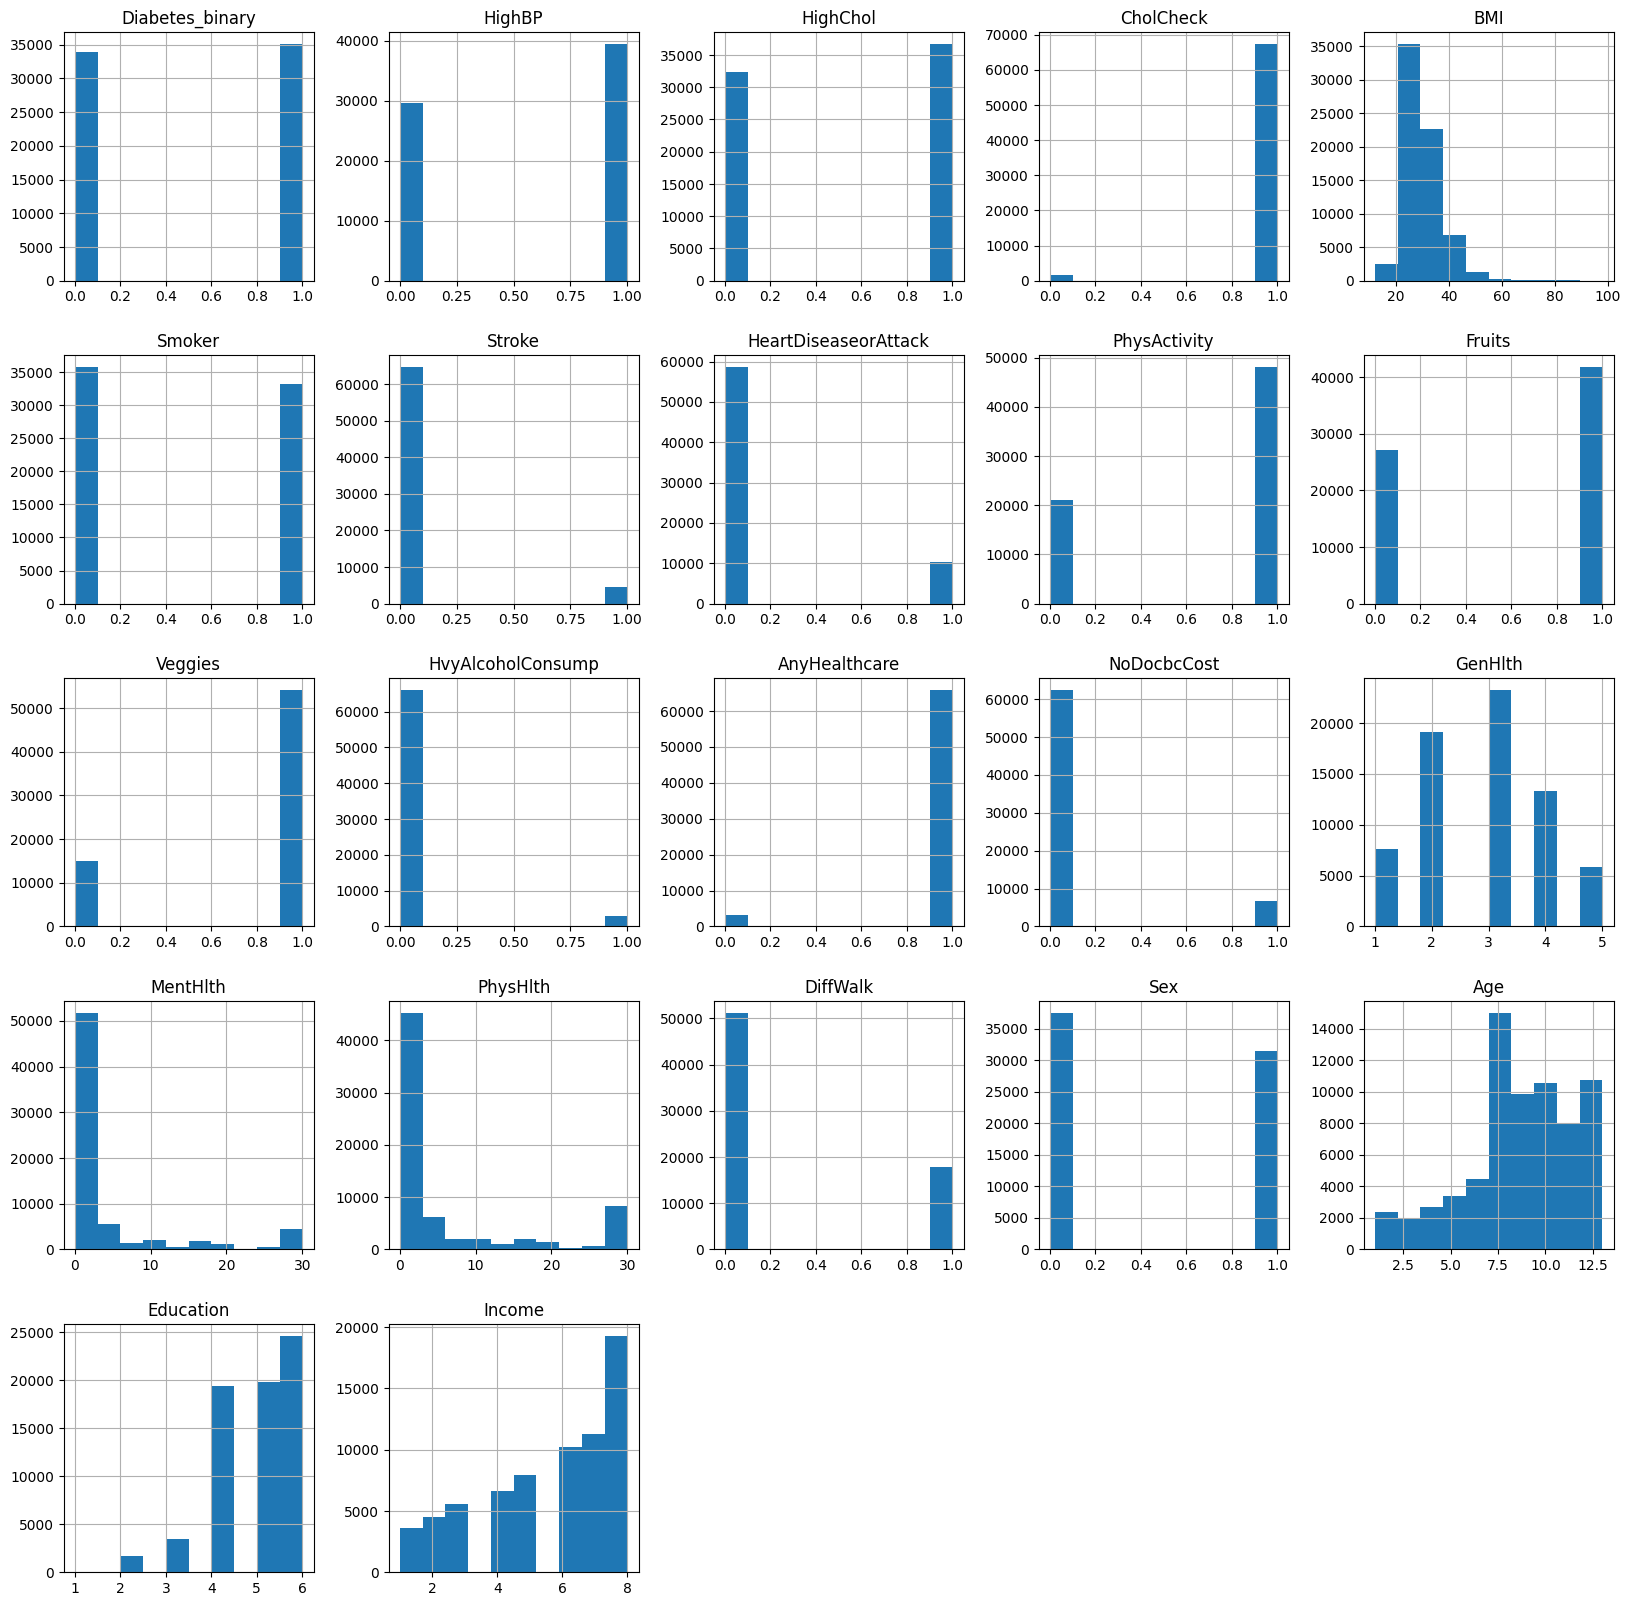

In [ ]:
df.hist(figsize = (20,20))
plt.show()

### **Checking correlation between variables**

Highly correlated variables in a machine learning model cause multicollinearity, leading to redundancy and confusion. This results in overfitting, poor performance on new data, and reduced interpretability. It can also lead to biased or unstable results, degrading the model's reliability and generalizability.



<Axes: >

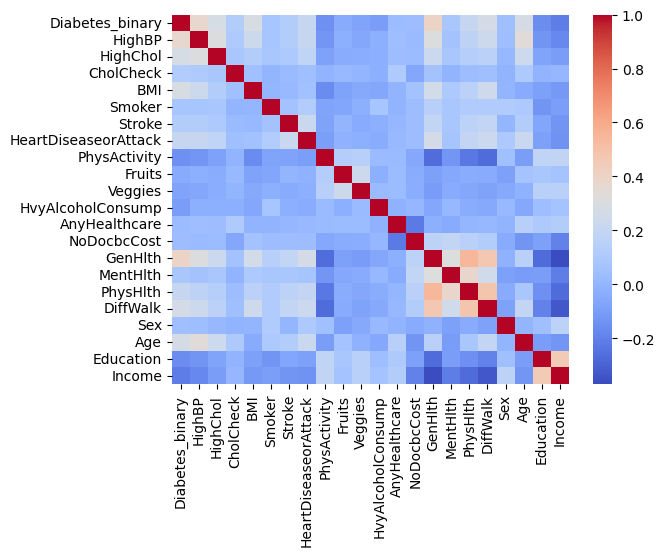

In [ ]:
# Necessary to prevent using two highly correlated variables within the model
sns.heatmap(df.corr(), cmap='coolwarm')

## Data Preparation

### **Feature Extraction**

We plan on removing "Education", "Income", "NoDocbcCost" and "AnyHealthcare" from the set of features used to predict diabetes as we believe they may not be relevant to the target variable or the problem at hand. Irrelevant features can add noise and reduce the model's accuracy. Note that this model primarily focuses on user health.

"Sex" is an additional feature that we're removing. We acknowledge that there are some studies that report a correlation between sexual orientation and an individual's likelihood at developing Type 1 or Type 2 diabetes, however correlation does not infer causation and is out of the scope for our implementation. In an attempt to remove as much noise and bias as possible, we'll be using strictly health metrics (with the inclusion of age).

Removing these features also reduces the complexity of the model so that we are able to avoid the curse of dimensionality.


In [ ]:
df=df.drop(['Income', 'Education', 'Sex', 'NoDocbcCost', 'AnyHealthcare'], axis=1)

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,30,0,4
1,0,1,1,1,26,1,1,0,0,1,0,0,3,0,0,0,12
2,0,0,0,1,26,0,0,0,1,1,1,0,1,0,10,0,13
3,0,1,1,1,28,1,0,0,1,1,1,0,3,0,3,0,11
4,0,0,0,1,29,1,0,0,1,1,1,0,2,0,0,0,8


### **Feature Explanation**

We have features that we believe reflects a person's state of health ranging from physical conditions such as high blood pressure to lifestyle choices like diet, smoking, and exercise. We also evaluate a person's mental condition as we believe poor mental health can negatively impact a person's lifestyle choices.

**HighBP**: High blood pressure (hypertension) is closely linked with diabetes. People with hypertension are at a higher risk of developing type 2 diabetes due to shared risk factors such as obesity and insulin resistance.  

**HighChol**: High cholesterol levels, particularly high levels of LDL (bad cholesterol) and low levels of HDL (good cholesterol), are associated with an increased risk of developing type 2 diabetes. Dyslipidemia (abnormal lipid levels) is common in diabetic patients.              

**CholCheck**: Regular cholesterol checks indicate awareness and management of cholesterol levels. Individuals who monitor their cholesterol are likely to be more health-conscious, which could influence their risk factors for diabetes.              

**BMI**: BMI is a measure of body fat based on height and weight. A higher BMI is strongly associated with an increased risk of type 2 diabetes. Obesity is one of the major risk factors for diabetes.                    

**Smoker**: Smoking is a risk factor for developing diabetes. Smokers are 30-40% more likely to develop type 2 diabetes than non-smokers. Smoking increases inflammation and impairs insulin sensitivity.                  

**Stroke**: A history of stroke can indicate underlying cardiovascular issues, which are related to diabetes. Both conditions share common risk factors such as hypertension and obesity.                 

**HeartDiseaseorAttack**: Similar to stroke, a history of heart disease or heart attack indicates cardiovascular problems, which are closely linked with diabetes. The presence of heart disease is often associated with higher rates of diabetes.    

**PhysActivity**: Regular physical activity helps control weight, blood glucose levels, and improves insulin sensitivity, reducing the risk of developing type 2 diabetes. Low physical activity levels are a significant risk factor for diabetes.           

**Fruits**: A diet rich in fruits provides essential vitamins, minerals, and fiber, which can help maintain a healthy weight and improve insulin sensitivity, thus reducing diabetes risk.                 

**Veggies**: Vegetables are nutrient-dense and high in fiber, contributing to better weight management and improved insulin sensitivity, which can lower the risk of diabetes.                

**HvyAlcoholConsump**: Heavy alcohol consumption can lead to weight gain, insulin resistance, and other metabolic problems, increasing the risk of diabetes. Moderate alcohol consumption might have a different impact, but excessive intake is clearly a risk factor.

**GenHlth**: Self-reported general health levels can be an indicator of overall well-being. Poor general health is often associated with higher risks of chronic conditions, including diabetes.                 

**MentHlth**: Poor mental health, such as depression and stress, can negatively impact lifestyle choices and lead to behaviors that increase the risk of diabetes, such as poor diet and lack of exercise.             

**PhysHlth**: Physical health levels can reflect the presence of chronic conditions and overall physical functioning. Poor physical health is commonly associated with higher risks of developing diabetes.              

**DiffWalk**: Difficulty walking may indicate limited physical activity, which is a risk factor for diabetes. Mobility issues can also be associated with obesity and other health conditions related to diabetes.             

**Age**: The risk of developing type 2 diabetes increases with age. Older adults are more likely to have risk factors such as decreased physical activity, poor diet, and higher rates of obesity.           


## Modeling

### Training and Testing Splits

First we will split the data using a train test split. This model validation procedure simulates the effects of model performance on new data by performing a split of 30% testing and 70% training data. We can avoid the pitfalls of overfitting and bias that may be captured in the dataset. The sampling method is without replacement.

Our target is `Diabetes_binary`, we can separate the target from the dataset by dropping it from the original dataframe. For reproducbility purposes we have  defined a random state for all of our diabetes models.

In [ ]:
x = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Decision Tree (Vanilla)

For our base model we will use the single decision tree classifier from scikit-learn. The decision tree uses a flowchart of nodes to represent the branching paths for all decision outcomes.

We begin by initializing the `DecisionTreeClassifier` method. This method fits the data from the `x_train` and `y_train` splits which then trains the decision tree model. `x_train` contains the relevant model features and the `y_train` contains the target labels for our training data.

To validate our results we will run predictions on the training and testing datasets. This is to verify that the model has not been overfitted to our training data and that we can make accurate predictions in a production setting. We measure 4 main performance metrics: accuracy, precision, recall, and f1-score.

**Accuracy:** How often the model classifier is correct.

**Precision:** How often the model is correct when making a prediction on the target label.

**Recall:** How often the model identifies positive samples from all true positive samples.

**F1-Score:** Harmonic mean of precision and recall.

In [ ]:
# Creating and fitting decision tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

In [ ]:
y_hat = clf.predict(x_train) # Predict the response for train dataset

y_pred = clf.predict(x_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Train Classification Report\n",classification_report(y_train,y_hat))
print("Test Classification Report\n",classification_report(y_test,y_pred))

Train Accuracy: 0.9629077970169014
Test Accuracy: 0.6564340187276764
Train Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     23840
           1       0.98      0.94      0.96     24499

    accuracy                           0.96     48339
   macro avg       0.96      0.96      0.96     48339
weighted avg       0.96      0.96      0.96     48339

Test Classification Report
               precision    recall  f1-score   support

           0       0.64      0.68      0.66     10120
           1       0.67      0.64      0.65     10598

    accuracy                           0.66     20718
   macro avg       0.66      0.66      0.66     20718
weighted avg       0.66      0.66      0.66     20718



### Support Vector Machine

The Support Vector Machine attempts to classify data by finding an optimal line or hyperplane between classes in N-Dimensional space. The algorithim tries to maximize the margin distance between each class to reduce the effects of random noise and overfitting.

Similar to the vanilla decision tree we initialize the SVM with the `SVC` function, fit the training data, and measure performance metrics below.

In [ ]:
# Creating and fitting support vector machine classifer
svm_clf = svm.SVC(random_state=42)
svm_clf.fit(x_train, y_train)

SVC(random_state=42)

In [ ]:
svm_y_hat = svm_clf.predict(x_train) # Predict the response for train dataset

svm_y_pred = svm_clf.predict(x_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, svm_y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
print("Train Classification Report\n",classification_report(y_train,svm_y_hat))
print("Test Classification Report\n",classification_report(y_test,svm_y_pred))

Train Accuracy: 0.740933821551956
Test Accuracy: 0.7478521092769572
Train Classification Report
               precision    recall  f1-score   support

           0       0.77      0.68      0.72     23840
           1       0.72      0.80      0.76     24499

    accuracy                           0.74     48339
   macro avg       0.74      0.74      0.74     48339
weighted avg       0.74      0.74      0.74     48339

Test Classification Report
               precision    recall  f1-score   support

           0       0.77      0.69      0.73     10120
           1       0.73      0.81      0.77     10598

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



### Random Forest Classifier

Random Forest is an ensemble method that expands upon the vanilla decision tree by averaging the predictions of multiple decision trees to improve accuracy and further reduce overfitting. This algorithim utilizes both the bagging method and feature randomness to create an uncorrelated forest of decision trees.

Methods for initializing and fitting follows a simliar pattern to the previous models, this model uses the `RandomForestClassifier` from sickit-learn.

In [ ]:
# Creating and fitting random forest
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(x_train, y_train)

In [ ]:
rf_y_hat = rf.predict(x_train) # Predict the response for train dataset

rf_y_pred = rf.predict(x_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, rf_y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
print("Train Classification Report\n",classification_report(y_train,rf_y_hat))
print("Test Classification Report\n",classification_report(y_test,rf_y_pred))

Train Accuracy: 0.9629077970169014
Test Accuracy: 0.7224635582585192
Train Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     23840
           1       0.97      0.96      0.96     24499

    accuracy                           0.96     48339
   macro avg       0.96      0.96      0.96     48339
weighted avg       0.96      0.96      0.96     48339

Test Classification Report
               precision    recall  f1-score   support

           0       0.73      0.69      0.71     10120
           1       0.72      0.75      0.73     10598

    accuracy                           0.72     20718
   macro avg       0.72      0.72      0.72     20718
weighted avg       0.72      0.72      0.72     20718



## Evaluation

### Decision Tree Hyperparameter Search

Our results have shown good performance but it could be improved. We can optimize our parameters using a hyperparameter search. These are configuration variables that can be set before the model training begins which controls the learning process. We begin by providing a list of parameters ranging from `max_depth` to `max_features`. Parameters are then given a range of samples or number of features to optimize. We fine tune these hyperparameters using `RandomizedSearchCV` on our specified distributions by performing a random search. Note that this method does not attempt to estimate all parameter settings, instead `n_iter` specifies the number of parameter settings that are tested. For splitting we use a 5 fold cross validation.

In [ ]:
dt_param_grid = {
    'max_depth': randint(1, 20),  # Depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
    }

dt_grid_search = RandomizedSearchCV(clf, dt_param_grid, n_iter=5, cv=5,
                                    random_state=42)

# Fit the GridSearchCV to the data
dt_grid_search.fit(x_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters: ", dt_grid_search.best_params_)

Best hyperparameters:  {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9}


### Decision Tree with Optimized Parameters

The vanilla decision tree is re-run with the optimized hyperparameters.

In [ ]:
clf_op = tree.DecisionTreeClassifier(max_depth=11,
                                     max_features=sqrt,
                                     min_samples_leaf=4,
                                     min_samples_split=9,
                                     random_state=42)
clf_op = clf_op.fit(x_train, y_train)

In [ ]:
clf_op_y_hat = clf_op.predict(x_train) # Predict the response for train dataset

clf_op_y_pred = clf_op.predict(x_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, clf_op_y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, clf_op_y_pred))
print("Train Classification Report\n",classification_report(y_train,clf_op_y_hat))
print("Test Classification Report\n",classification_report(y_test,clf_op_y_pred))

Train Accuracy: 0.7578352882765469
Test Accuracy: 0.7372333236798919
Train Classification Report
               precision    recall  f1-score   support

           0       0.78      0.72      0.74     23840
           1       0.74      0.80      0.77     24499

    accuracy                           0.76     48339
   macro avg       0.76      0.76      0.76     48339
weighted avg       0.76      0.76      0.76     48339

Test Classification Report
               precision    recall  f1-score   support

           0       0.75      0.70      0.72     10120
           1       0.73      0.77      0.75     10598

    accuracy                           0.74     20718
   macro avg       0.74      0.74      0.74     20718
weighted avg       0.74      0.74      0.74     20718



### Decision Tree Confusion Matrix

The confusion matrix is a handy tool that lets us visualize the classification performance. Starting from the top left the grid is split into: true positive, false positive, false negative, and true negative. We can see how the scores are derived from the number of labels that the model correctly predicts or misses.

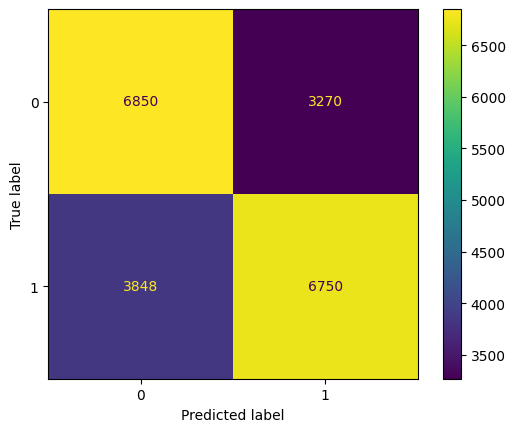

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Support Vector Machine Hyperparameter Search

The Support Vector Machine will use a different hyperparameter search. This time we will be conducting an exhaustive search using `GridSearchCV` on different parameters in the SVM. `C` is the l2 regularization parameter where the regularization strength is inversely proportional to `C`. `gamma` is the kernel coefficent for `rbf` and is a prequisite parameter for this function. We differentiate the tests by performing a 2 fold cross validation on the grid search.

In [ ]:
svm_param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} ,


svm_grid_search = GridSearchCV(svm_clf, svm_param_grid,refit = True, cv=2,
                                 verbose = 3)

# Fit the GridSearchCV to the data
svm_grid_search.fit(x_train, y_train)

# Print the best set of hyperparameters
print("SVM Best hyperparameters: ", svm_grid_search.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time= 1.5min
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time= 1.5min
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.717 total time= 1.1min
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time= 1.0min
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.734 total time=  53.0s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.721 total time=  50.6s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.729 total time=  54.2s
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.721 total time=  54.5s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.666 total time= 2.6min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.666 total time= 2.7min
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.734 total time= 1.4min
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;

### Support Vector Machine with Optimized Parameters

The SVM is re-run with optimized parameters.

In [ ]:
svm_op =  svm.SVC(C=100, gamma=0.001, kernel='rbf',
                  random_state=42)
svm_op = svm_op.fit(x_train, y_train)

In [ ]:
svm_op_y_hat = svm_op.predict(x_train) # Predict the response for train dataset

svm_op_y_pred = svm_op.predict(x_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, svm_op_y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, svm_op_y_pred))
print("Train Classification Report\n",classification_report(y_train,svm_op_y_hat))
print("Test Classification Report\n",classification_report(y_test,svm_op_y_pred))

Train Accuracy: 0.7454850121020294
Test Accuracy: 0.7537407085626026
Train Classification Report
               precision    recall  f1-score   support

           0       0.79      0.67      0.72     23840
           1       0.72      0.82      0.77     24499

    accuracy                           0.75     48339
   macro avg       0.75      0.74      0.74     48339
weighted avg       0.75      0.75      0.74     48339

Test Classification Report
               precision    recall  f1-score   support

           0       0.79      0.68      0.73     10120
           1       0.73      0.83      0.77     10598

    accuracy                           0.75     20718
   macro avg       0.76      0.75      0.75     20718
weighted avg       0.76      0.75      0.75     20718



### Support Vector Machine Confusion Matrix

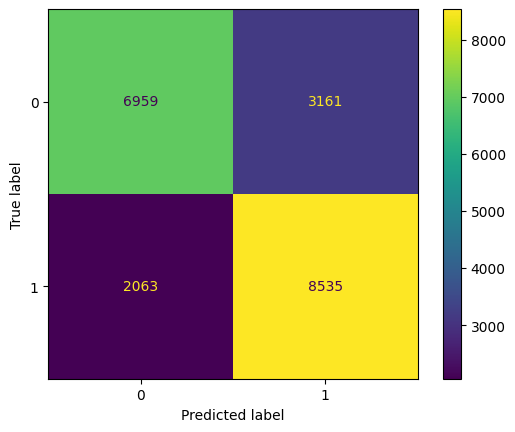

In [ ]:
svm_cm = metrics.confusion_matrix(y_test, svm_y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=svm_cm).plot();

### Random Forest Hyperparameter Search

Random Forest moves back to the randomized search with a some new hyperparameter configurations. Here we also test the quality of criterion measures such as gini and entropy. Like before we run a 5 fold cross validation.

In [ ]:
rf_param_grid = {'criterion':["gini","entropy"],

'max_depth': [2, 3, 4, 5],
'min_samples_leaf': [10, 20, 30],
'min_samples_split': [20, 30, 40]}

rf_grid_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=5, cv=5,random_state=42)

# Fit the GridSearchCV to the data
rf_grid_search.fit(x_train, y_train)

# Print the best set of hyperparameters
print("Best hyperparameters: ", rf_grid_search.best_params_)

Best hyperparameters:  {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'gini'}


### Random Forest with Optimized Parameters

Random Forest is re-run with optimized parameters.

In [ ]:
rf_op =  RandomForestClassifier(criterion='gini', min_samples_split = 30,
                                min_samples_leaf = 10, max_depth = 5,
                                random_state=42)
rf_op = rf_op.fit(x_train, y_train)

In [ ]:
rf_op_y_hat = rf_op.predict(x_train) # Predict the response for train dataset

rf_op_y_pred = rf_op.predict(x_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, rf_op_y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, rf_op_y_pred))
print("Train Classification Report\n",classification_report(y_train,rf_op_y_hat))
print("Test Classification Report\n",classification_report(y_test,rf_op_y_pred))

Train Accuracy: 0.737561803098947
Test Accuracy: 0.7442320687325031
Train Classification Report
               precision    recall  f1-score   support

           0       0.76      0.69      0.72     23840
           1       0.72      0.78      0.75     24499

    accuracy                           0.74     48339
   macro avg       0.74      0.74      0.74     48339
weighted avg       0.74      0.74      0.74     48339

Test Classification Report
               precision    recall  f1-score   support

           0       0.76      0.70      0.73     10120
           1       0.73      0.78      0.76     10598

    accuracy                           0.74     20718
   macro avg       0.75      0.74      0.74     20718
weighted avg       0.75      0.74      0.74     20718



### Random Forest Confusion Matrix

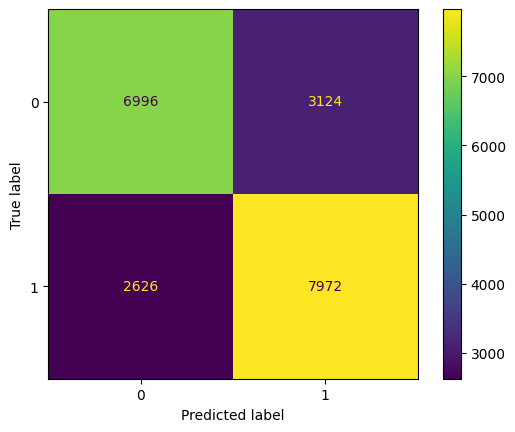

In [ ]:
rf_cm = metrics.confusion_matrix(y_test, rf_y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=rf_cm).plot();

## Deployment

Deploying a machine learning solution at scale involves careful planning and integration of various components to ensure performance, reliability, and security. By leveraging FastAPI, load balancing, containerization, and robust CI/CD pipelines, we can build a scalable and efficient system to enhance the early detection and management of diabetes.

### Web/Mobile Application

Develop a mobile application that collects health-related data from users, sends this data to the API where the machine learning model is served, and displays predictions regarding the user's risk for diabetes.

**User Interface**: Design an intuitive interface for users to input health metrics such as general health scores, BMI, age, physical activity, etc.

**Data Collection**: Implement functionality to securely gather and validate user-provided health data within the mobile app.

**API Integration**: Integrate with the FastAPI backend API endpoints to transmit collected data for predictive analysis.

**Prediction Display**: Display the prediction results indicating the likelihood of diabetes onset based on the machine learning model's analysis.

### Inference Endpoint

The deployment architecture will comprise several components to ensure scalability, reliability, and efficient handling of requests. The key components are:

**FastAPI**: The main entry point for API requests.

**Load Balancer**: Distributes incoming requests across multiple instances of the FastAPI application.

**Machine Learning Model Server**: Serves the trained model and handles inference requests.

**Database**: Stores health metrics data and user information.

**Monitoring and Logging Tools**: Ensures the system's health and performance are tracked and logged.

**CI/CD Pipeline**: Automates the deployment process for continuous integration and delivery.

Upon receiving approval, our immediate action will be to notify the Information Security (InfoSec) team. This notification serves as a pivotal step to engage InfoSec experts in comprehensively evaluating and addressing potential risks associated with both data security and application security. Their assessment will focus on scrutinizing our system architecture, data handling protocols, and application framework to pinpoint vulnerabilities that could jeopardize the confidentiality, integrity, or availability of our data and operational infrastructure.

InfoSec professionals will leverage their specialized knowledge to implement robust safeguards against unauthorized access, data breaches, cyber threats, and other security risks. This proactive approach ensures that our systems are fortified with the necessary defenses and adhere strictly to industry standards and regulatory requirements. By involving InfoSec early in the process, we prioritize preemptive security measures, thereby reinforcing our commitment to maintaining a secure and resilient operational environment.

## Concluding Statements

### Model Selection
We evaluated three machine learning models—Random Forest, Support Vector Machine (SVM), and Decision Tree—using various classification metrics to determine the best model for deployment in a production environment. After hyperparameter tuning for all models and careful analysis of their performance on both the training and test datasets, we chose the Support Vector Machine (SVM) classifier as the optimal model for our needs.


The SVM classifier demonstrated the highest test accuracy of 0.7537, outperforming both the Random Forest and Decision Tree models. It also maintained a good balance between precision, recall, and F1-score across both classes, particularly excelling in the F1-score for class 1. This indicates that the SVM is effective in distinguishing between the two classes in our dataset, providing reliable predictions on unseen data.

### Limitations of Other Models

**Random Forest:**

Despite hyperparameter tuning, the Random Forest model exhibited a test accuracy of 0.7442, slightly lower than that of the SVM. Its precision, recall, and F1-scores were comparable but consistently lower than those of the SVM, particularly in terms of precision for class 1.
The Random Forest also showed a marginally higher train-test accuracy gap, suggesting a bit more overfitting compared to the SVM.

**Decision Tree:**

Even with hyperparameter tuning, the Decision Tree model demonstrated significant overfitting, with a train accuracy of 0.9629 and a much lower test accuracy of 0.6562. This indicates that while the model learned the training data exceptionally well, it failed to generalize to new data, making it unsuitable for production use.
Additionally, the Decision Tree's precision, recall, and F1-scores were the lowest among the three models, confirming its inadequacy in providing reliable predictions.








### Recommendations for Future Iterations

**Advanced Hyperparameter Tuning:**

Although we employed hyperparameter tuning, exploring more sophisticated tuning techniques such as Bayesian optimization could further enhance model performance.

**Ensemble Methods:**

Exploring advanced ensemble methods that combine multiple models might yield better results. Techniques such as stacking or boosting could help in leveraging the strengths of different models to improve overall performance.

In conclusion, our choice of the SVM classifier is grounded in its superior performance metrics and balanced approach to handling both classes in our dataset, even after hyperparameter tuning for all models. By addressing the limitations of the other models and implementing the recommended strategies, future iterations of this project can further enhance predictive accuracy and model robustness, leading to more reliable and effective outcomes in production.